In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import os
import random
from tqdm import tqdm
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [8]:
path='Humans'
def images_upload(path):
    images=[]
    for root,sub,files in os.walk(path):
        for file in tqdm(files):
            filename=root+os.sep+file
            if filename.endswith('jpg') or filename.endswith('png'):
                images.append(filename)
    return images
images=images_upload(path)

100%|██████████| 7219/7219 [00:00<00:00, 1127823.61it/s]


In [34]:
np.random.shuffle(images)

In [31]:
len(images)

7123

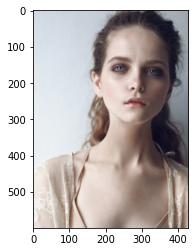

In [35]:
idx = 8
img = images[idx]
img = cv2.imread(img) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [11]:
def convert_image_labels(images):
    labels=[]
    for i in tqdm(images):
        i = cv2.imread(i)
        i=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        res_i=cv2.resize(i,(128,128))
        del i
        labels.append(res_i)
    return labels


def convert_image_inputs(images):
    inputs=[]
    for z in tqdm(images):
        z = cv2.imread(z)
        z=cv2.cvtColor(z,  cv2.COLOR_BGR2GRAY)
        res_z=cv2.resize(z,(128,128))
        del z
        inputs.append(res_z)
    return inputs

labels=convert_image_labels(images)
inputs=convert_image_inputs(images)

100%|██████████| 7123/7123 [02:45<00:00, 43.05it/s]


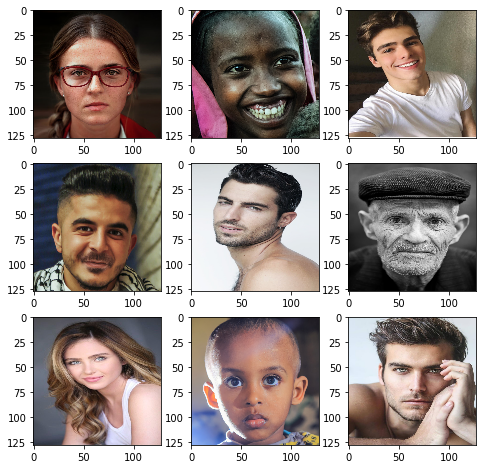

In [12]:
def show_labels(labels):
    plt.figure(figsize=(8,8))
    for i in range(9):
        idx=np.random.randint(0,len(labels))
        plt.subplot(3,3,i+1)
        img=labels[idx]
        plt.imshow(img)

show_labels(labels)

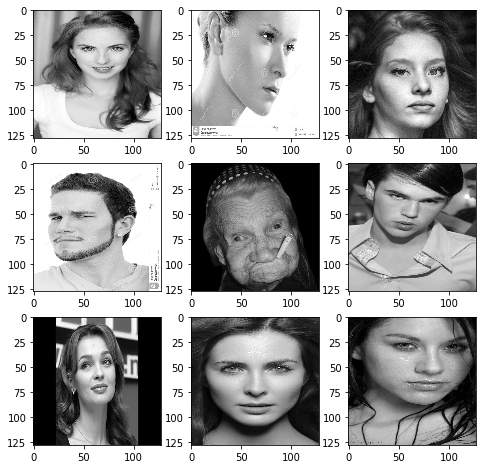

In [13]:
def show_input(inputs):
    plt.figure(figsize=(8,8))
    for i in range(9):
        idx=np.random.randint(0,len(inputs))
        plt.subplot(3,3,i+1)
        img=inputs[idx]
        plt.imshow(img,cmap='gray')
show_input(inputs)

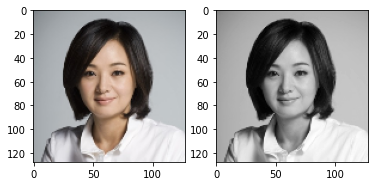

In [14]:
def images_compare(inputs,labels):
    idx_new=np.random.randint(0,len(labels))
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(labels[idx_new])
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(inputs[idx_new],cmap='gray')
    plt.show()
images_compare(inputs,labels)

In [15]:
def build_model(inputsize=(128,128,1)):
    input = tf.keras.Input(shape=(inputsize))

    conv = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv1')(
        input)
    x=tfl.BatchNormalization()(conv)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv2')(
        x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x1 = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv3')(
        x)
    x=tfl.BatchNormalization()(x1)
    x=tfl.LeakyReLU()(x)
    x = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPool1')(x)

    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv4')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv5')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x2 = tfl.Conv2D(128, (3, 3), padding="same", strides=(1, 1),kernel_initializer='he_normal',
                    name='Conv6')(x)
    x=tfl.BatchNormalization()(x2)
    x=tfl.LeakyReLU()(x)
    x = tfl.MaxPool2D(pool_size=(2, 2), name='MaxPool2')(x)

    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv7')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv8')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x3 = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv9')(x)
    x=tfl.BatchNormalization()(x3)
    x=tfl.LeakyReLU()(x)
    x = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPool3')(x)

    
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv10')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv11')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x4 = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv12')(x)
    x=tfl.BatchNormalization()(x4)
    x=tfl.LeakyReLU()(x)
    x = tfl.MaxPool2D(pool_size=(2, 2), strides=(2, 2), name='MaxPool4')(x)

    x = tfl.Conv2D(1024, (3, 3), padding="same",name='Conv13')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(1024, (3, 3), padding="same",name='Conv14')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(1024, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv15')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2DTranspose(512, (3, 3), strides=2, padding="same")(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)

    x = tfl.concatenate([x, x4], axis=3)
    
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv16')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv17')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(512, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv18')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2DTranspose(256, (3, 3), strides=2, padding="same")(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)

    x = tfl.concatenate([x, x3], axis=3)

    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv19')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv20')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(256, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv21')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2DTranspose(128, (3, 3), strides=2, padding="same")(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)

    x = tfl.concatenate([x, x2], axis=3)

    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv22')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv23')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(128, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv24')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2DTranspose(64, (3, 3), strides=2, padding="same")(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)

    x = tfl.concatenate([x, x1], axis=3)

    x = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv25')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(64, (3, 3), padding="same",kernel_initializer='he_normal', name='Conv26')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    x = tfl.Conv2D(64, (3, 3), padding="same",name='Conv27')(x)
    x=tfl.BatchNormalization()(x)
    x=tfl.LeakyReLU()(x)
    outputs = tfl.Conv2D(3, (1, 1), padding="same", activation='sigmoid', name='Outputs')(x)
    model = tf.keras.Model(inputs=input, outputs=outputs)
    model.summary()
    return model

In [16]:
def split_data(inputs,labels,test_size=0.2):
    labels=np.array(labels)
    inputs=np.array(inputs)
    x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=test_size)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.05)
    return x_train, x_valid,x_test ,y_train, y_valid,y_test

In [17]:
def callbacks(patience=5):
    checkpoint = tf.keras.callbacks.ModelCheckpoint('seg_model.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)
    early=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=patience,min_delta=0.001)
    callbacks_list=[checkpoint, early]
    return callbacks_list

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 64  640         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 64  256        ['Conv1[0][0]']                  
 alization)                     )                                                             

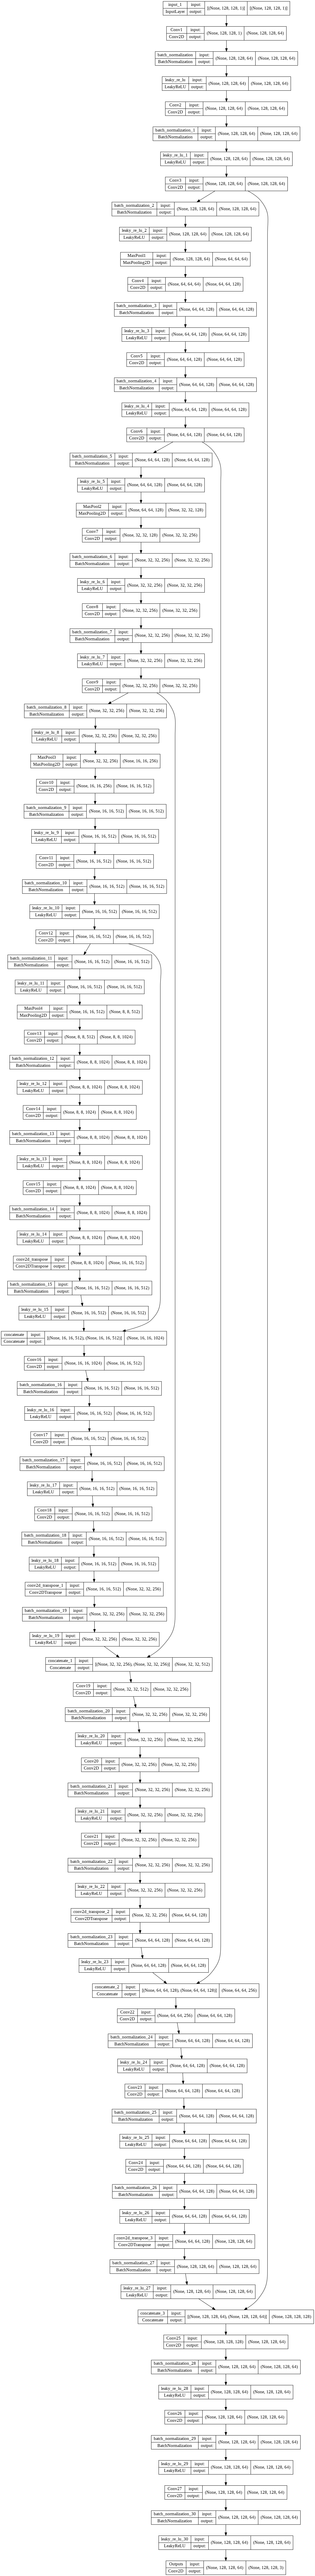

In [18]:
model=build_model()

img_file = './model_structure.png'
tf.keras.utils.plot_model(model, to_file=img_file, show_shapes=True, show_layer_names=True)

In [19]:
x_train, x_valid,x_test ,y_train, y_valid,y_test=split_data(inputs,labels,test_size=0.05)
x_train, x_valid, x_test=x_train/255.0,x_valid/255.0,x_test/255.0
y_train, y_valid, y_test=y_train/255.0,y_valid/255.0,y_test/255.0

In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.0, nesterov=True),loss=tf.keras.losses.mean_squared_error,metrics=['acc'])
hist=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_valid,y_valid),callbacks=callbacks())

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
201/201 [==============================] - ETA: 0s - loss: 0.0151 - acc: 0.4343
Epoch 1: val_loss improved from inf to 0.01092, saving model to seg_model.h5
201/201 [==============================] - 163s 707ms/step - loss: 0.0151 - acc: 0.4343 - val_loss: 0.0109 - val_acc: 0.6769
Epoch 2/10
201/201 [==============================] - ETA: 0s - loss: 0.0076 - acc: 0.5931
Epoch 2: val_loss improved from 0.01092 to 0.00558, saving model to seg_model.h5
201/201 [==============================] - 142s 706ms/step - loss: 0.0076 - acc: 0.5931 - val_loss: 0.0056 - val_acc: 0.6916
Epoch 3/10
201/201 [==============================] - ETA: 0s - loss: 0.0062 - acc: 0.6530
Epoch 3: val_loss improved from 0.00558 to 0.00500, saving model to seg_model.h5
201/201 [==============================] - 147s 733ms/step - loss: 0.0062 - acc: 0.6530 - val_loss: 0.0050 - val_acc: 0.6877
Epoch 4/10
201/201 [==============================] - ETA: 0s - loss: 0.0057 - acc: 0.6769
Epoch 4: val_loss impr

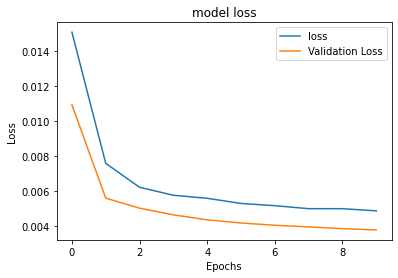

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["loss","Validation Loss"])
plt.show()

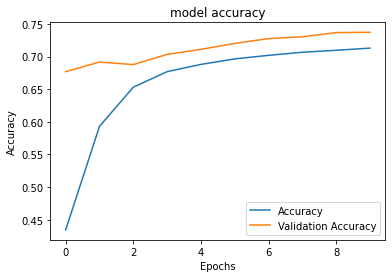

In [22]:
plt.plot(hist.history["acc"])
plt.plot(hist.history['val_acc'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

In [23]:
pred=model.predict(x_test)

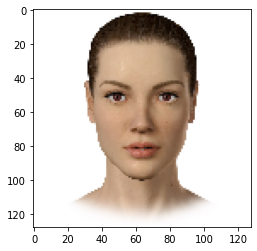

In [25]:
plt.imshow(y_test[8])

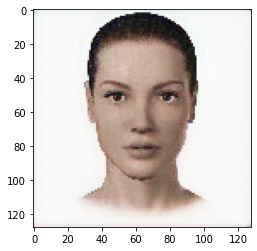

In [26]:
plt.imshow(pred[8])

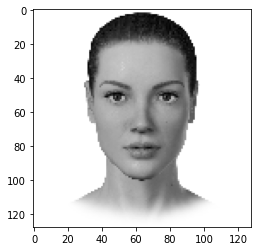

In [27]:
plt.imshow(x_test[8],cmap='gray')

Модель показала слабые результаты, когда ее стояла задача раскрасить изображение в оттенках серого. Много гле используется LAB изображение вместо изображения RGB, потому что два числа (a, b) легче предсказать, чем три. Даже если будет использовано больше изображений, любой модели будет трудно предсказать цвет глаз, волос и оттенок кожи. Использование GAN в качестве решения этой проблемы является идеальным вариантом. С помощью GAN модель может предсказать, является ли изображение "реальным" с точки зрения раскрашивания, тк она берет среднее значение и использует эти цвета, чтобы максимально уменьшить потерю L1. 